In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

C:\Users\Kartik chouhan\AppData\Local\Temp\ipykernel_20740\2253935231.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.values[:20], y=missing.index[:20], palette='magma')


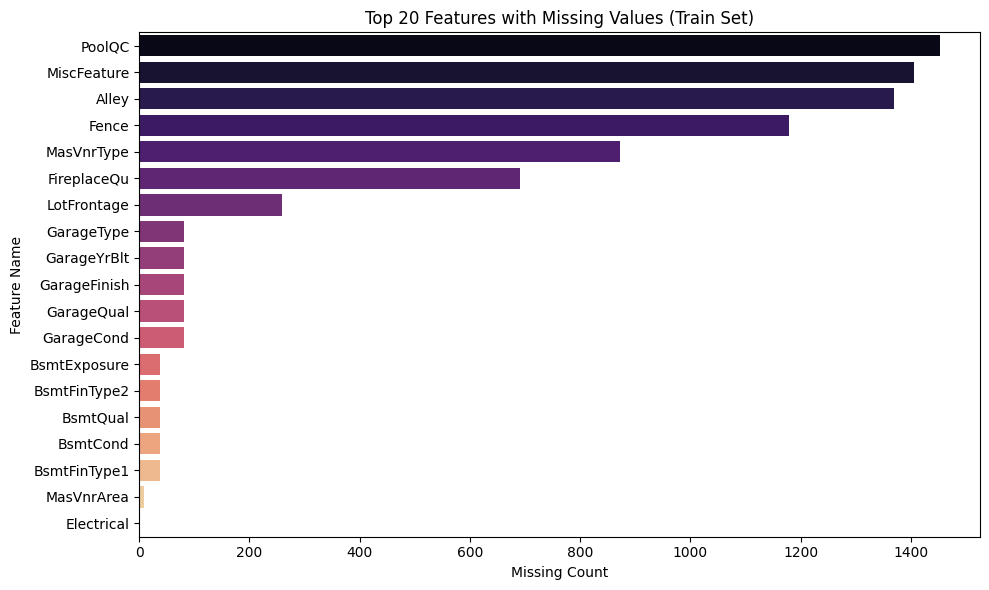

In [5]:
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=missing.values[:20], y=missing.index[:20], palette='magma')
plt.title("Top 20 Features with Missing Values (Train Set)")
plt.xlabel("Missing Count")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

In [6]:
cols_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
train = train.drop(columns=cols_to_drop)
test = test.drop(columns=cols_to_drop)

In [7]:
for col in train.columns:
    if train[col].dtype == 'object':
        train[col].fillna(train[col].mode()[0], inplace=True)
        test[col].fillna(test[col].mode()[0], inplace=True)
    else:
        train[col].fillna(train[col].median(), inplace=True)
        test[col].fillna(test[col].median(), inplace=True)

C:\Users\Kartik chouhan\AppData\Local\Temp\ipykernel_20740\2787103259.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].median(), inplace=True)
C:\Users\Kartik chouhan\AppData\Local\Temp\ipykernel_20740\2787103259.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

KeyError: 'SalePrice'

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in train.select_dtypes(include='object').columns:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

In [10]:
X = train.drop(['Id', 'SalePrice'], axis=1)
y = train['SalePrice']
X_test = test.drop(['Id'], axis=1)

In [12]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X, y)
tree_preds = tree_model.predict(X)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("\n Decision Tree Evaluation Metrics:")
print(f"Mean Absolute Error:  {mean_absolute_error(y, tree_preds):.2f}")
print(f"Mean Squared Error:  {mean_squared_error(y, tree_preds):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y, tree_preds)):.2f}")
print(f"R-square:   {r2_score(y, tree_preds):.4f}")


 Decision Tree Evaluation Metrics:
Mean Absolute Error:  21500.23
Mean Squared Error:  842534488.45
Root Mean Squared Error: 29026.44
R-square:   0.8664


In [16]:
test_preds = tree_model.predict(X_test)

In [17]:
submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': test_preds
})
submission.to_csv('decision_tree_submission.csv', index=False)
print("\n✅ Submission file saved as 'decision_tree_submission.csv'")


✅ Submission file saved as 'decision_tree_submission.csv'


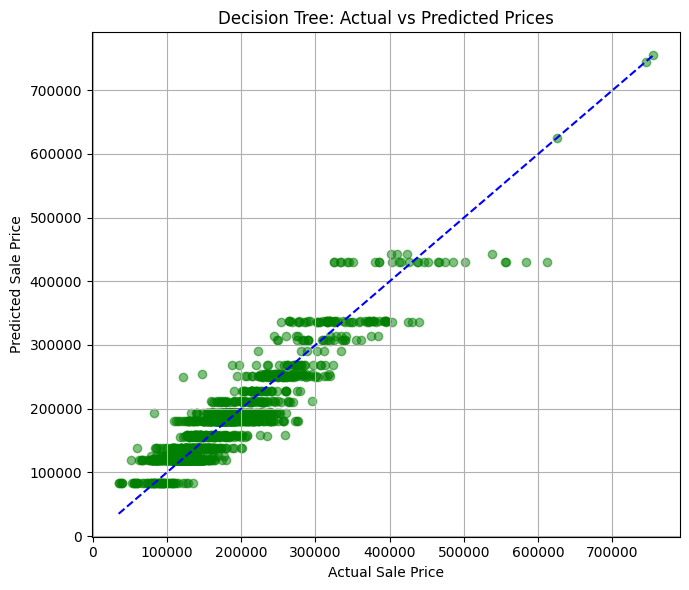

In [18]:
plt.figure(figsize=(7, 6))
plt.scatter(y, tree_preds, alpha=0.5, color='green')
plt.plot([min(y), max(y)], [min(y), max(y)], color='blue', linestyle='--')
plt.title("Decision Tree: Actual vs Predicted Prices")
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.grid(True)
plt.tight_layout()
plt.show()